In [1]:
#Интеллектуальные вычислительные системы
#Семенков Алексей 420-М1
#Лабораторная работа №1 Формирование базы правил нечеткой системы моделирования нелинейной системы
#Вариант 7 (19 номер в списке, вариантов 12, 19-12=7)
#Функция: z= y * sin(x+y) x(-p/2<=x<=p/2) y(-p/2<=y<=p/2) z(-0.5<=z<=1.5)

In [2]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 4.9 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=15c50f6ee44a53d70a20f9f128ff7b999f4bf503edc373cddb622ae18d6ef7f4
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import skfuzzy as fuzz
from skfuzzy import control as ctrl

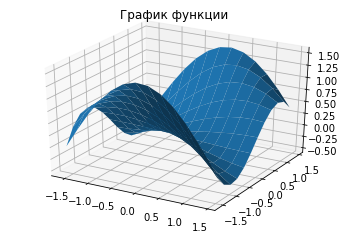

In [4]:
fix, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(-math.pi/2, math.pi/2, 0.25)
Y = np.arange(-math.pi/2, math.pi/2, 0.25)
X, Y = np.meshgrid(X, Y)
z = Y * np.sin(X + Y)
surface = ax.plot_surface(X,Y,z)
ax.set_zlim()
plt.title('График функции')
plt.show()

In [5]:
# Множества термов
terms5 = [
          'очень малая',
          'малая',
          'средняя',
          'большая',
          'очень большая'
]

terms7 = [
          'сильно малая',
          'очень малая',
          'малая',
          'средняя',
          'большая',
          'очень большая',
          'сильно большая'
]

terms9 = [
          'сильно малая',
          'очень малая',
          'малая',
          'ниже среднего',
          'средняя',
          'выше среднего',
          'большая',
          'очень большая',
          'сильно большая'
]

terms11 = [
           'сильно малая',
           'очень малая',
           'малая',
           'выше малой',
           'ниже среднего',
           'средняя',
           'выше среднего',
           'ниже большой',
           'большая',
           'очень большая',
           'сильно большая'
]

In [6]:
def intervals(start, end, num_terms):
    terms = []
    if num_terms == 5:
        terms = terms5
    elif num_terms == 7:
        terms = terms7
    elif num_terms == 9:
        terms = terms9
    elif num_terms == 11:
        terms = terms11

    step = (abs(start) + abs(end)) / num_terms

    print("{} термов:".format(num_terms))
    for j in range(num_terms):
        print("{} на отрезке от {:.2f} до {:.2f}".format(terms[j], start + step * j, start + step * (j + 1)))

In [7]:
print("\033[1m" + "Данные для построения функции принадлежности X:" + "\033[0m")
for i in [5, 7, 9, 11]:
  intervals(-math.pi/2, math.pi/2, i)

Данные для построения функции принадлежности X:
5 термов:
очень малая на отрезке от -1.57 до -0.94
малая на отрезке от -0.94 до -0.31
средняя на отрезке от -0.31 до 0.31
большая на отрезке от 0.31 до 0.94
очень большая на отрезке от 0.94 до 1.57
7 термов:
сильно малая на отрезке от -1.57 до -1.12
очень малая на отрезке от -1.12 до -0.67
малая на отрезке от -0.67 до -0.22
средняя на отрезке от -0.22 до 0.22
большая на отрезке от 0.22 до 0.67
очень большая на отрезке от 0.67 до 1.12
сильно большая на отрезке от 1.12 до 1.57
9 термов:
сильно малая на отрезке от -1.57 до -1.22
очень малая на отрезке от -1.22 до -0.87
малая на отрезке от -0.87 до -0.52
ниже среднего на отрезке от -0.52 до -0.17
средняя на отрезке от -0.17 до 0.17
выше среднего на отрезке от 0.17 до 0.52
большая на отрезке от 0.52 до 0.87
очень большая на отрезке от 0.87 до 1.22
сильно большая на отрезке от 1.22 до 1.57
11 термов:
сильно малая на отрезке от -1.57 до -1.29
очень малая на отрезке от -1.29 до -1.00
малая на отр

In [8]:
print("\033[1m" + "Данные для построения функции принадлежности Y:" + "\033[0m")
for i in [5, 7, 9, 11]:
  intervals(-math.pi/2, math.pi/2, i)

Данные для построения функции принадлежности Y:
5 термов:
очень малая на отрезке от -1.57 до -0.94
малая на отрезке от -0.94 до -0.31
средняя на отрезке от -0.31 до 0.31
большая на отрезке от 0.31 до 0.94
очень большая на отрезке от 0.94 до 1.57
7 термов:
сильно малая на отрезке от -1.57 до -1.12
очень малая на отрезке от -1.12 до -0.67
малая на отрезке от -0.67 до -0.22
средняя на отрезке от -0.22 до 0.22
большая на отрезке от 0.22 до 0.67
очень большая на отрезке от 0.67 до 1.12
сильно большая на отрезке от 1.12 до 1.57
9 термов:
сильно малая на отрезке от -1.57 до -1.22
очень малая на отрезке от -1.22 до -0.87
малая на отрезке от -0.87 до -0.52
ниже среднего на отрезке от -0.52 до -0.17
средняя на отрезке от -0.17 до 0.17
выше среднего на отрезке от 0.17 до 0.52
большая на отрезке от 0.52 до 0.87
очень большая на отрезке от 0.87 до 1.22
сильно большая на отрезке от 1.22 до 1.57
11 термов:
сильно малая на отрезке от -1.57 до -1.29
очень малая на отрезке от -1.29 до -1.00
малая на отр

In [9]:
print("\033[1m" + "Данные для построения функции принадлежности Z:" + "\033[0m")
for i in [5, 7, 9, 11]:
  intervals(-0.5, 1.5, i)

Данные для построения функции принадлежности Z:
5 термов:
очень малая на отрезке от -0.50 до -0.10
малая на отрезке от -0.10 до 0.30
средняя на отрезке от 0.30 до 0.70
большая на отрезке от 0.70 до 1.10
очень большая на отрезке от 1.10 до 1.50
7 термов:
сильно малая на отрезке от -0.50 до -0.21
очень малая на отрезке от -0.21 до 0.07
малая на отрезке от 0.07 до 0.36
средняя на отрезке от 0.36 до 0.64
большая на отрезке от 0.64 до 0.93
очень большая на отрезке от 0.93 до 1.21
сильно большая на отрезке от 1.21 до 1.50
9 термов:
сильно малая на отрезке от -0.50 до -0.28
очень малая на отрезке от -0.28 до -0.06
малая на отрезке от -0.06 до 0.17
ниже среднего на отрезке от 0.17 до 0.39
средняя на отрезке от 0.39 до 0.61
выше среднего на отрезке от 0.61 до 0.83
большая на отрезке от 0.83 до 1.06
очень большая на отрезке от 1.06 до 1.28
сильно большая на отрезке от 1.28 до 1.50
11 термов:
сильно малая на отрезке от -0.50 до -0.32
очень малая на отрезке от -0.32 до -0.14
малая на отрезке от -0

In [10]:
def rules(start, end, num_terms, label):
  terms = []
  if num_terms == 5:
    terms = terms5
  elif num_terms == 7:
    terms = terms7
  elif num_terms == 9:
    terms = terms9
  elif num_terms == 11:
    terms = terms11

  step = (abs(start) + abs(end)) / num_terms
  func = ctrl.Antecedent(np.arange(start, end + step, step), label)
  ranges = [None] * num_terms
  for i in np.arange(0, num_terms, 1):
    triangle = []
    if i == 0:
      triangle = [start, start, start + step]
      ranges[i] = {}
      ranges[i]['start'] = triangle[1]
      ranges[i]['end'] = triangle[2] - (step / 2)
    else:
      triangle = [
                  (i - 1) * step - abs(start),
                  i * step - abs(start),
                  (i + 1) * step - abs(start)
      ]
      if num_terms - 1 == i:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[1]
      else:
        ranges[i] = {}
        ranges[i]['start'] = triangle[0] + (step / 2)
        ranges[i]['end'] = triangle[2] - (step / 2)
    ranges[i]['term'] = terms[i]
    func[terms[i]] = fuzz.trimf(func.universe, triangle)
  func.view()
  return ranges 

Функция принадлежности Х при 5 термах


[{'end': -1.2566370614359172,
  'start': -1.5707963267948966,
  'term': 'очень малая'},
 {'end': -0.6283185307179586, 'start': -1.2566370614359172, 'term': 'малая'},
 {'end': 0.0, 'start': -0.6283185307179586, 'term': 'средняя'},
 {'end': 0.6283185307179586, 'start': 0.0, 'term': 'большая'},
 {'end': 0.9424777960769379,
  'start': 0.6283185307179586,
  'term': 'очень большая'}]

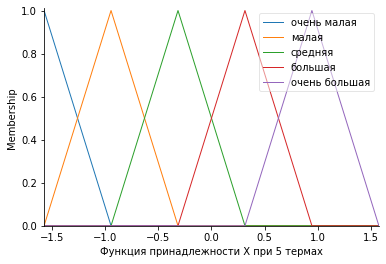

In [11]:
print('Функция принадлежности Х при 5 термах')
rules(-math.pi/2, math.pi/2, 5, 'Функция принадлежности Х при 5 термах')

Функция принадлежности Х при 7 термах


[{'end': -1.3463968515384828,
  'start': -1.5707963267948966,
  'term': 'сильно малая'},
 {'end': -0.8975979010256552,
  'start': -1.3463968515384828,
  'term': 'очень малая'},
 {'end': -0.4487989505128276, 'start': -0.8975979010256552, 'term': 'малая'},
 {'end': 0.0, 'start': -0.4487989505128276, 'term': 'средняя'},
 {'end': 0.4487989505128276, 'start': 0.0, 'term': 'большая'},
 {'end': 0.8975979010256552,
  'start': 0.4487989505128276,
  'term': 'очень большая'},
 {'end': 1.121997376282069,
  'start': 0.8975979010256552,
  'term': 'сильно большая'}]

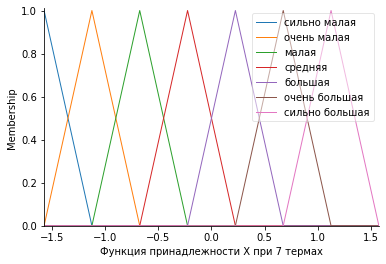

In [12]:
print('Функция принадлежности Х при 7 термах')
rules(-math.pi/2, math.pi/2, 7, 'Функция принадлежности Х при 7 термах')

Функция принадлежности Х при 9 термах


[{'end': -1.3962634015954636,
  'start': -1.5707963267948966,
  'term': 'сильно малая'},
 {'end': -1.0471975511965976,
  'start': -1.3962634015954636,
  'term': 'очень малая'},
 {'end': -0.6981317007977319, 'start': -1.0471975511965976, 'term': 'малая'},
 {'end': -0.34906585039886595,
  'start': -0.6981317007977318,
  'term': 'ниже среднего'},
 {'end': 2.7755575615628914e-17,
  'start': -0.34906585039886595,
  'term': 'средняя'},
 {'end': 0.34906585039886573,
  'start': -2.7755575615628914e-17,
  'term': 'выше среднего'},
 {'end': 0.6981317007977317, 'start': 0.34906585039886595, 'term': 'большая'},
 {'end': 1.0471975511965976,
  'start': 0.6981317007977317,
  'term': 'очень большая'},
 {'end': 1.2217304763960306,
  'start': 1.0471975511965976,
  'term': 'сильно большая'}]

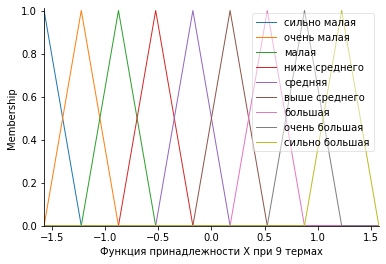

In [13]:
print('Функция принадлежности Х при 9 термах')
rules(-math.pi/2, math.pi/2, 9, 'Функция принадлежности Х при 9 термах')

Функция принадлежности Х при 11 термах


[{'end': -1.427996660722633,
  'start': -1.5707963267948966,
  'term': 'сильно малая'},
 {'end': -1.1423973285781066,
  'start': -1.4279966607226333,
  'term': 'очень малая'},
 {'end': -0.85679799643358, 'start': -1.1423973285781066, 'term': 'малая'},
 {'end': -0.5711986642890533,
  'start': -0.8567979964335799,
  'term': 'выше малой'},
 {'end': -0.2855993321445266,
  'start': -0.5711986642890533,
  'term': 'ниже среднего'},
 {'end': -8.326672684688674e-17,
  'start': -0.2855993321445266,
  'term': 'средняя'},
 {'end': 0.2855993321445266,
  'start': 8.326672684688674e-17,
  'term': 'выше среднего'},
 {'end': 0.5711986642890533,
  'start': 0.2855993321445266,
  'term': 'ниже большой'},
 {'end': 0.8567979964335798, 'start': 0.5711986642890533, 'term': 'большая'},
 {'end': 1.1423973285781068,
  'start': 0.85679799643358,
  'term': 'очень большая'},
 {'end': 1.28519699465037,
  'start': 1.1423973285781064,
  'term': 'сильно большая'}]

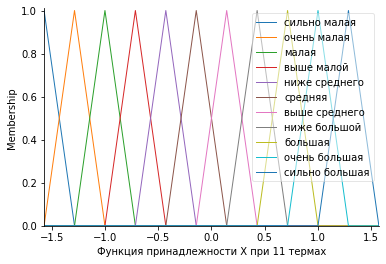

In [14]:
print('Функция принадлежности Х при 11 термах')
rules(-math.pi/2, math.pi/2, 11, 'Функция принадлежности Х при 11 термах')

Функция принадлежности Y при 5 термах


[{'end': -1.2566370614359172,
  'start': -1.5707963267948966,
  'term': 'очень малая'},
 {'end': -0.6283185307179586, 'start': -1.2566370614359172, 'term': 'малая'},
 {'end': 0.0, 'start': -0.6283185307179586, 'term': 'средняя'},
 {'end': 0.6283185307179586, 'start': 0.0, 'term': 'большая'},
 {'end': 0.9424777960769379,
  'start': 0.6283185307179586,
  'term': 'очень большая'}]

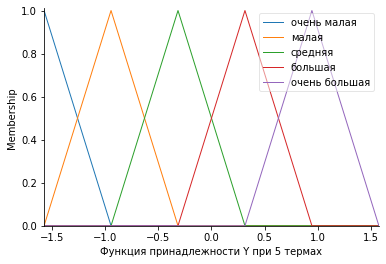

In [15]:
print('Функция принадлежности Y при 5 термах')
rules(-math.pi/2, math.pi/2, 5, 'Функция принадлежности Y при 5 термах')

Функция принадлежности Y при 7 термах


[{'end': -1.3463968515384828,
  'start': -1.5707963267948966,
  'term': 'сильно малая'},
 {'end': -0.8975979010256552,
  'start': -1.3463968515384828,
  'term': 'очень малая'},
 {'end': -0.4487989505128276, 'start': -0.8975979010256552, 'term': 'малая'},
 {'end': 0.0, 'start': -0.4487989505128276, 'term': 'средняя'},
 {'end': 0.4487989505128276, 'start': 0.0, 'term': 'большая'},
 {'end': 0.8975979010256552,
  'start': 0.4487989505128276,
  'term': 'очень большая'},
 {'end': 1.121997376282069,
  'start': 0.8975979010256552,
  'term': 'сильно большая'}]

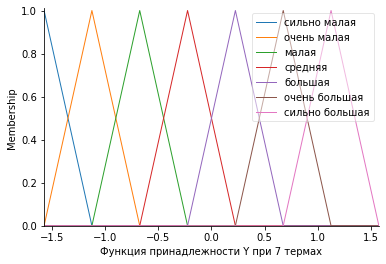

In [16]:
print('Функция принадлежности Y при 7 термах')
rules(-math.pi/2, math.pi/2, 7, 'Функция принадлежности Y при 7 термах')

Функция принадлежности Y при 9 термах


[{'end': -1.3962634015954636,
  'start': -1.5707963267948966,
  'term': 'сильно малая'},
 {'end': -1.0471975511965976,
  'start': -1.3962634015954636,
  'term': 'очень малая'},
 {'end': -0.6981317007977319, 'start': -1.0471975511965976, 'term': 'малая'},
 {'end': -0.34906585039886595,
  'start': -0.6981317007977318,
  'term': 'ниже среднего'},
 {'end': 2.7755575615628914e-17,
  'start': -0.34906585039886595,
  'term': 'средняя'},
 {'end': 0.34906585039886573,
  'start': -2.7755575615628914e-17,
  'term': 'выше среднего'},
 {'end': 0.6981317007977317, 'start': 0.34906585039886595, 'term': 'большая'},
 {'end': 1.0471975511965976,
  'start': 0.6981317007977317,
  'term': 'очень большая'},
 {'end': 1.2217304763960306,
  'start': 1.0471975511965976,
  'term': 'сильно большая'}]

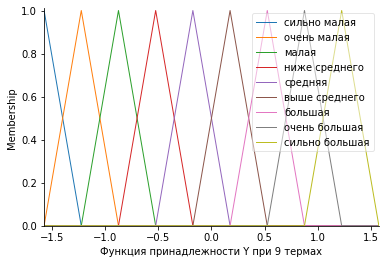

In [17]:
print('Функция принадлежности Y при 9 термах')
rules(-math.pi/2, math.pi/2, 9, 'Функция принадлежности Y при 9 термах')

Функция принадлежности Y при 11 термах


[{'end': -1.427996660722633,
  'start': -1.5707963267948966,
  'term': 'сильно малая'},
 {'end': -1.1423973285781066,
  'start': -1.4279966607226333,
  'term': 'очень малая'},
 {'end': -0.85679799643358, 'start': -1.1423973285781066, 'term': 'малая'},
 {'end': -0.5711986642890533,
  'start': -0.8567979964335799,
  'term': 'выше малой'},
 {'end': -0.2855993321445266,
  'start': -0.5711986642890533,
  'term': 'ниже среднего'},
 {'end': -8.326672684688674e-17,
  'start': -0.2855993321445266,
  'term': 'средняя'},
 {'end': 0.2855993321445266,
  'start': 8.326672684688674e-17,
  'term': 'выше среднего'},
 {'end': 0.5711986642890533,
  'start': 0.2855993321445266,
  'term': 'ниже большой'},
 {'end': 0.8567979964335798, 'start': 0.5711986642890533, 'term': 'большая'},
 {'end': 1.1423973285781068,
  'start': 0.85679799643358,
  'term': 'очень большая'},
 {'end': 1.28519699465037,
  'start': 1.1423973285781064,
  'term': 'сильно большая'}]

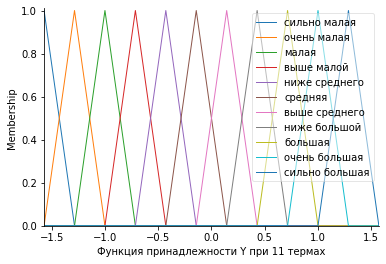

In [18]:
print('Функция принадлежности Y при 11 термах')
rules(-math.pi/2, math.pi/2, 11, 'Функция принадлежности Y при 11 термах')

Функция принадлежности Z при 5 термах


[{'end': -0.3, 'start': -0.5, 'term': 'очень малая'},
 {'end': 0.10000000000000003, 'start': -0.3, 'term': 'малая'},
 {'end': 0.5000000000000002, 'start': 0.10000000000000003, 'term': 'средняя'},
 {'end': 0.9000000000000001, 'start': 0.5, 'term': 'большая'},
 {'end': 1.1, 'start': 0.9000000000000001, 'term': 'очень большая'}]

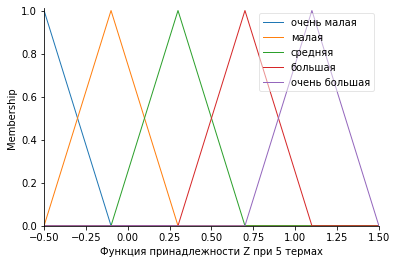

In [19]:
print('Функция принадлежности Z при 5 термах')
rules(-0.5, 1.5, 5, 'Функция принадлежности Z при 5 термах')

Функция принадлежности Z при 7 термах


[{'end': -0.35714285714285715, 'start': -0.5, 'term': 'сильно малая'},
 {'end': -0.07142857142857145,
  'start': -0.35714285714285715,
  'term': 'очень малая'},
 {'end': 0.21428571428571425, 'start': -0.07142857142857145, 'term': 'малая'},
 {'end': 0.49999999999999994, 'start': 0.21428571428571425, 'term': 'средняя'},
 {'end': 0.7857142857142856, 'start': 0.49999999999999994, 'term': 'большая'},
 {'end': 1.0714285714285714,
  'start': 0.7857142857142856,
  'term': 'очень большая'},
 {'end': 1.2142857142857142,
  'start': 1.0714285714285712,
  'term': 'сильно большая'}]

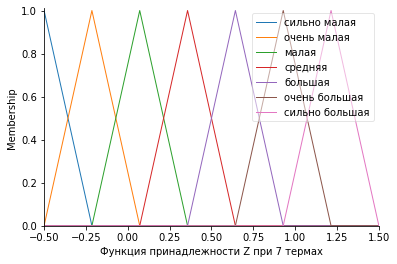

In [20]:
print('Функция принадлежности Z при 7 термах')
rules(-0.5, 1.5, 7, 'Функция принадлежности Z при 7 термах')

Функция принадлежности Z при 9 термах


[{'end': -0.3888888888888889, 'start': -0.5, 'term': 'сильно малая'},
 {'end': -0.16666666666666669,
  'start': -0.3888888888888889,
  'term': 'очень малая'},
 {'end': 0.055555555555555525, 'start': -0.16666666666666669, 'term': 'малая'},
 {'end': 0.27777777777777773,
  'start': 0.055555555555555525,
  'term': 'ниже среднего'},
 {'end': 0.5, 'start': 0.27777777777777773, 'term': 'средняя'},
 {'end': 0.7222222222222221,
  'start': 0.49999999999999994,
  'term': 'выше среднего'},
 {'end': 0.9444444444444442, 'start': 0.7222222222222223, 'term': 'большая'},
 {'end': 1.1666666666666665,
  'start': 0.9444444444444444,
  'term': 'очень большая'},
 {'end': 1.2777777777777777,
  'start': 1.1666666666666665,
  'term': 'сильно большая'}]

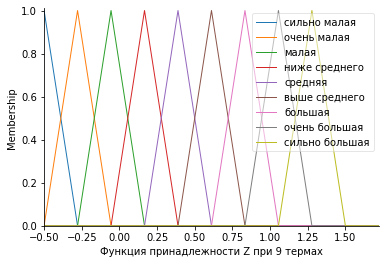

In [21]:
print('Функция принадлежности Z при 9 термах')
rules(-0.5, 1.5, 9, 'Функция принадлежности Z при 9 термах')

Функция принадлежности Z при 11 термах


[{'end': -0.40909090909090906, 'start': -0.5, 'term': 'сильно малая'},
 {'end': -0.22727272727272727,
  'start': -0.40909090909090906,
  'term': 'очень малая'},
 {'end': -0.0454545454545455, 'start': -0.22727272727272727, 'term': 'малая'},
 {'end': 0.13636363636363638,
  'start': -0.04545454545454544,
  'term': 'выше малой'},
 {'end': 0.31818181818181823,
  'start': 0.13636363636363633,
  'term': 'ниже среднего'},
 {'end': 0.4999999999999999, 'start': 0.31818181818181823, 'term': 'средняя'},
 {'end': 0.6818181818181818,
  'start': 0.5000000000000001,
  'term': 'выше среднего'},
 {'end': 0.8636363636363636,
  'start': 0.6818181818181818,
  'term': 'ниже большой'},
 {'end': 1.0454545454545456, 'start': 0.8636363636363636, 'term': 'большая'},
 {'end': 1.2272727272727275,
  'start': 1.0454545454545454,
  'term': 'очень большая'},
 {'end': 1.3181818181818183,
  'start': 1.2272727272727273,
  'term': 'сильно большая'}]

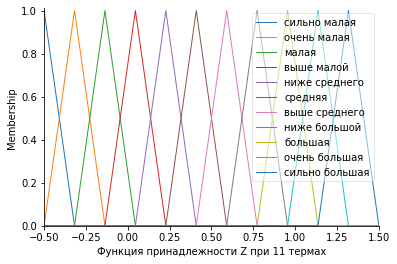

In [22]:
print('Функция принадлежности Z при 11 термах')
rules(-0.5, 1.5, 11, 'Функция принадлежности Z при 11 термах')

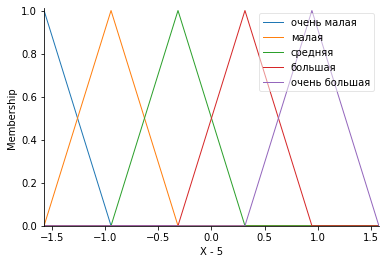

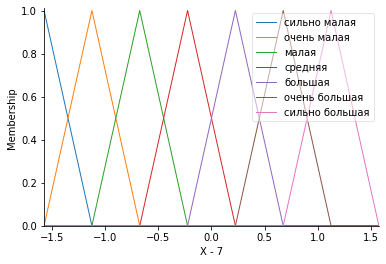

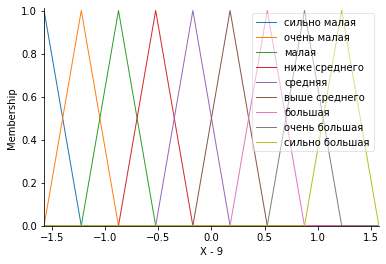

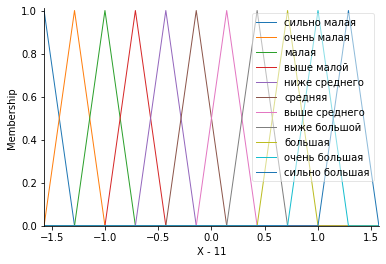

In [23]:
#Диапазоны для Мамдани
rangesX_5 = rules(-math.pi/2, math.pi/2, 5, 'Х - 5')
rangesX_7 = rules(-math.pi/2, math.pi/2, 7, 'Х - 7')
rangesX_9 = rules(-math.pi/2, math.pi/2, 9, 'Х - 9')
rangesX_11 = rules(-math.pi/2, math.pi/2, 11, 'Х - 11')

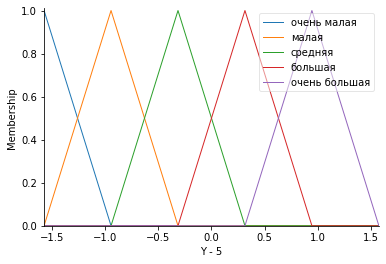

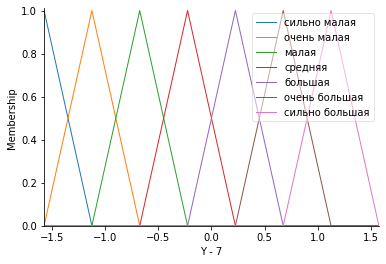

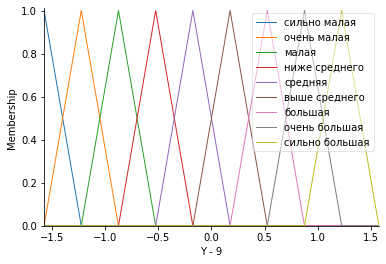

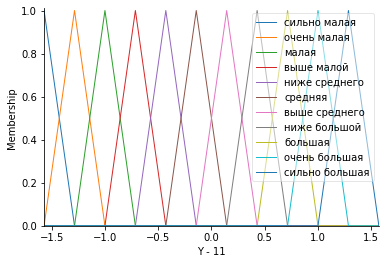

In [24]:
rangesY_5 = rules(-math.pi/2, math.pi/2, 5, 'Y - 5')
rangesY_7 = rules(-math.pi/2, math.pi/2, 7, 'Y - 7')
rangesY_9 = rules(-math.pi/2, math.pi/2, 9, 'Y - 9')
rangesY_11 = rules(-math.pi/2, math.pi/2, 11, 'Y - 11')

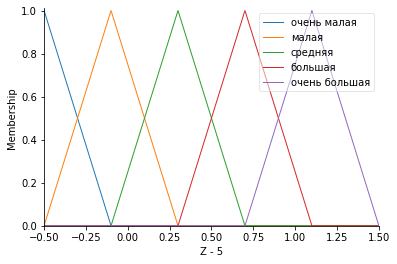

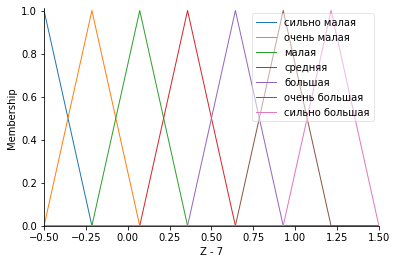

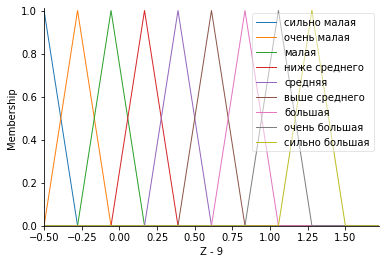

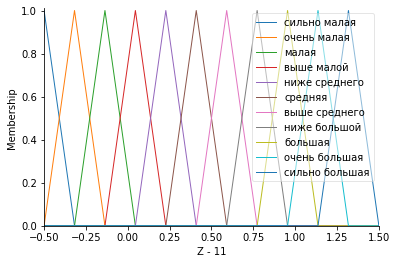

In [25]:
rangesZ_5 = rules(-0.5, 1.5, 5, 'Z - 5')
rangesZ_7 = rules(-0.5, 1.5, 7, 'Z - 7')
rangesZ_9 = rules(-0.5, 1.5, 9, 'Z - 9')
rangesZ_11 = rules(-0.5, 1.5, 11, 'Z - 11')

In [26]:
print("\033[1m" + "Мамдани для 5 термов" + "\033[0m")
for rangeX in rangesX_5:
  for rangeY in rangesY_5:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y * math.sin(x + y)
    for rangeZ in rangesZ_5:
      if rangeZ['start'] < z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], rangeZ['term']))

Мамдани для 5 термов
Если х = очень малая и y = очень малая то F= средняя
Если х = очень малая и y = малая то F= большая
Если х = очень малая и y = средняя то F= средняя
Если х = очень малая и y = большая то F= малая
Если х = очень малая и y = очень большая то F= очень малая
Если х = малая и y = очень малая то F= очень большая
Если х = малая и y = малая то F= большая
Если х = малая и y = средняя то F= средняя
Если х = малая и y = большая то F= малая
Если х = малая и y = очень большая то F= малая
Если х = средняя и y = малая то F= большая
Если х = средняя и y = средняя то F= средняя
Если х = средняя и y = большая то F= малая
Если х = средняя и y = очень большая то F= средняя
Если х = большая и y = малая то F= большая
Если х = большая и y = средняя то F= малая
Если х = большая и y = большая то F= средняя
Если х = большая и y = очень большая то F= большая
Если х = очень большая и y = очень малая то F= большая
Если х = очень большая и y = малая то F= средняя
Если х = очень большая и y = ср

In [27]:
print("\033[1m" + "Мамдани для 7 термов" + "\033[0m")
for rangeX in rangesX_7:
  for rangeY in rangesY_7:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y * math.sin(x + y)
    for rangeZ in rangesZ_7:
      if rangeZ['start'] < z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], rangeZ['term']))

Мамдани для 7 термов
Если х = сильно малая и y = сильно малая то F= средняя
Если х = сильно малая и y = очень малая то F= большая
Если х = сильно малая и y = малая то F= большая
Если х = сильно малая и y = средняя то F= средняя
Если х = сильно малая и y = большая то F= очень малая
Если х = сильно малая и y = очень большая то F= сильно малая
Если х = сильно малая и y = сильно большая то F= сильно малая
Если х = очень малая и y = сильно малая то F= большая
Если х = очень малая и y = очень малая то F= очень большая
Если х = очень малая и y = малая то F= большая
Если х = очень малая и y = средняя то F= средняя
Если х = очень малая и y = большая то F= очень малая
Если х = очень малая и y = очень большая то F= очень малая
Если х = очень малая и y = сильно большая то F= очень малая
Если х = малая и y = очень малая то F= сильно большая
Если х = малая и y = малая то F= большая
Если х = малая и y = средняя то F= малая
Если х = малая и y = большая то F= очень малая
Если х = малая и y = очень боль

In [28]:
print("\033[1m" + "Мамдани для 9 термов" + "\033[0m")
for rangeX in rangesX_9:
  for rangeY in rangesY_9:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y * math.sin(x + y)
    for rangeZ in rangesZ_9:
      if rangeZ['start'] < z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], rangeZ['term']))

Мамдани для 9 термов
Если х = сильно малая и y = сильно малая то F= ниже среднего
Если х = сильно малая и y = очень малая то F= выше среднего
Если х = сильно малая и y = малая то F= выше среднего
Если х = сильно малая и y = ниже среднего то F= средняя
Если х = сильно малая и y = средняя то F= ниже среднего
Если х = сильно малая и y = выше среднего то F= очень малая
Если х = сильно малая и y = большая то F= сильно малая
Если х = сильно малая и y = сильно большая то F= очень малая
Если х = очень малая и y = сильно малая то F= выше среднего
Если х = очень малая и y = очень малая то F= большая
Если х = очень малая и y = малая то F= большая
Если х = очень малая и y = ниже среднего то F= выше среднего
Если х = очень малая и y = средняя то F= ниже среднего
Если х = очень малая и y = выше среднего то F= малая
Если х = очень малая и y = большая то F= очень малая
Если х = очень малая и y = очень большая то F= очень малая
Если х = очень малая и y = сильно большая то F= малая
Если х = малая и y = 

In [29]:
print("\033[1m" + "Мамдани для 11 термов" + "\033[0m")
for rangeX in rangesX_11:
  for rangeY in rangesY_11:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y * math.sin(x + y)
    for rangeZ in rangesZ_11:
      if rangeZ['start'] < z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], rangeZ['term']))

Мамдани для 11 термов
Если х = сильно малая и y = сильно малая то F= ниже среднего
Если х = сильно малая и y = очень малая то F= средняя
Если х = сильно малая и y = малая то F= выше среднего
Если х = сильно малая и y = выше малой то F= выше среднего
Если х = сильно малая и y = ниже среднего то F= средняя
Если х = сильно малая и y = средняя то F= ниже среднего
Если х = сильно малая и y = выше среднего то F= малая
Если х = сильно малая и y = ниже большой то F= очень малая
Если х = сильно малая и y = очень большая то F= сильно малая
Если х = сильно малая и y = сильно большая то F= очень малая
Если х = очень малая и y = сильно малая то F= выше среднего
Если х = очень малая и y = очень малая то F= ниже большой
Если х = очень малая и y = малая то F= ниже большой
Если х = очень малая и y = выше малой то F= выше среднего
Если х = очень малая и y = ниже среднего то F= средняя
Если х = очень малая и y = средняя то F= ниже среднего
Если х = очень малая и y = выше среднего то F= малая
Если х = оче

In [30]:
def singleton(term, term_num):
  if term_num == 5:
    return terms5.index(term) - ((term_num - 1) / 2)
  elif term_num == 7:
    return terms7.index(term) - ((term_num - 1) / 2)
  elif term_num == 9:
    return terms9.index(term) - ((term_num - 1) / 2)
  elif term_num == 11:
    return terms11.index(term) - ((term_num - 1) / 2)

In [31]:
print("\033[1m" + "Синглтон для 5 термов" + "\033[0m")
for rangeX in rangesX_5:
  for rangeY in rangesY_5:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y * math.sin(x + y)
    for rangeZ in rangesZ_5:
      if rangeZ['start'] < z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], singleton(rangeZ['term'], 5)))

Синглтон для 5 термов
Если х = очень малая и y = очень малая то F= 0.0
Если х = очень малая и y = малая то F= 1.0
Если х = очень малая и y = средняя то F= 0.0
Если х = очень малая и y = большая то F= -1.0
Если х = очень малая и y = очень большая то F= -2.0
Если х = малая и y = очень малая то F= 2.0
Если х = малая и y = малая то F= 1.0
Если х = малая и y = средняя то F= 0.0
Если х = малая и y = большая то F= -1.0
Если х = малая и y = очень большая то F= -1.0
Если х = средняя и y = малая то F= 1.0
Если х = средняя и y = средняя то F= 0.0
Если х = средняя и y = большая то F= -1.0
Если х = средняя и y = очень большая то F= 0.0
Если х = большая и y = малая то F= 1.0
Если х = большая и y = средняя то F= -1.0
Если х = большая и y = большая то F= 0.0
Если х = большая и y = очень большая то F= 1.0
Если х = очень большая и y = очень малая то F= 1.0
Если х = очень большая и y = малая то F= 0.0
Если х = очень большая и y = средняя то F= -1.0
Если х = очень большая и y = большая то F= 0.0
Если х = 

In [32]:
print("\033[1m" + "Синглтон для 7 термов" + "\033[0m")
for rangeX in rangesX_7:
  for rangeY in rangesY_7:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y * math.sin(x + y)
    for rangeZ in rangesZ_7:
      if rangeZ['start'] < z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], singleton(rangeZ['term'], 7)))

Синглтон для 7 термов
Если х = сильно малая и y = сильно малая то F= 0.0
Если х = сильно малая и y = очень малая то F= 1.0
Если х = сильно малая и y = малая то F= 1.0
Если х = сильно малая и y = средняя то F= 0.0
Если х = сильно малая и y = большая то F= -2.0
Если х = сильно малая и y = очень большая то F= -3.0
Если х = сильно малая и y = сильно большая то F= -3.0
Если х = очень малая и y = сильно малая то F= 1.0
Если х = очень малая и y = очень малая то F= 2.0
Если х = очень малая и y = малая то F= 1.0
Если х = очень малая и y = средняя то F= 0.0
Если х = очень малая и y = большая то F= -2.0
Если х = очень малая и y = очень большая то F= -2.0
Если х = очень малая и y = сильно большая то F= -2.0
Если х = малая и y = очень малая то F= 3.0
Если х = малая и y = малая то F= 1.0
Если х = малая и y = средняя то F= -1.0
Если х = малая и y = большая то F= -2.0
Если х = малая и y = очень большая то F= -1.0
Если х = малая и y = сильно большая то F= 0.0
Если х = средняя и y = очень малая то F= 3.

In [33]:
print("\033[1m" + "Синглтон для 9 термов" + "\033[0m")
for rangeX in rangesX_9:
  for rangeY in rangesY_9:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y * math.sin(x + y)
    for rangeZ in rangesZ_9:
      if rangeZ['start'] < z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], singleton(rangeZ['term'], 9)))

Синглтон для 9 термов
Если х = сильно малая и y = сильно малая то F= -1.0
Если х = сильно малая и y = очень малая то F= 1.0
Если х = сильно малая и y = малая то F= 1.0
Если х = сильно малая и y = ниже среднего то F= 0.0
Если х = сильно малая и y = средняя то F= -1.0
Если х = сильно малая и y = выше среднего то F= -3.0
Если х = сильно малая и y = большая то F= -4.0
Если х = сильно малая и y = сильно большая то F= -3.0
Если х = очень малая и y = сильно малая то F= 1.0
Если х = очень малая и y = очень малая то F= 2.0
Если х = очень малая и y = малая то F= 2.0
Если х = очень малая и y = ниже среднего то F= 1.0
Если х = очень малая и y = средняя то F= -1.0
Если х = очень малая и y = выше среднего то F= -2.0
Если х = очень малая и y = большая то F= -3.0
Если х = очень малая и y = очень большая то F= -3.0
Если х = очень малая и y = сильно большая то F= -2.0
Если х = малая и y = сильно малая то F= 3.0
Если х = малая и y = очень малая то F= 3.0
Если х = малая и y = малая то F= 2.0
Если х = мала

In [34]:
print("\033[1m" + "Синглтон для 11 термов" + "\033[0m")
for rangeX in rangesX_11:
  for rangeY in rangesY_11:
    x = (rangeX['start'] + rangeX['end']) / 2
    y = (rangeY['start'] + rangeY['end']) / 2
    z = y * math.sin(x + y)
    for rangeZ in rangesZ_11:
      if rangeZ['start'] < z < rangeZ['end']:
        print('Если х = {} и y = {} то F= {}'.format(rangeX['term'], rangeY['term'], singleton(rangeZ['term'], 11)))

Синглтон для 11 термов
Если х = сильно малая и y = сильно малая то F= -1.0
Если х = сильно малая и y = очень малая то F= 0.0
Если х = сильно малая и y = малая то F= 1.0
Если х = сильно малая и y = выше малой то F= 1.0
Если х = сильно малая и y = ниже среднего то F= 0.0
Если х = сильно малая и y = средняя то F= -1.0
Если х = сильно малая и y = выше среднего то F= -3.0
Если х = сильно малая и y = ниже большой то F= -4.0
Если х = сильно малая и y = очень большая то F= -5.0
Если х = сильно малая и y = сильно большая то F= -4.0
Если х = очень малая и y = сильно малая то F= 1.0
Если х = очень малая и y = очень малая то F= 2.0
Если х = очень малая и y = малая то F= 2.0
Если х = очень малая и y = выше малой то F= 1.0
Если х = очень малая и y = ниже среднего то F= 0.0
Если х = очень малая и y = средняя то F= -1.0
Если х = очень малая и y = выше среднего то F= -3.0
Если х = очень малая и y = ниже большой то F= -4.0
Если х = очень малая и y = большая то F= -4.0
Если х = очень малая и y = очень бо